# Quantum Entanglement: Theory and Simulation

## Introduction

Quantum entanglement is one of the most profound phenomena in quantum mechanics, famously described by Einstein as "spooky action at a distance." When two or more particles become entangled, their quantum states become correlated in such a way that the quantum state of each particle cannot be described independently of the others, even when separated by large distances.

## Theoretical Foundation

### Quantum States and Qubits

A single qubit exists in a superposition of basis states:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $\alpha, \beta \in \mathbb{C}$ and the normalization condition requires:

$$|\alpha|^2 + |\beta|^2 = 1$$

### Two-Qubit Systems

For a two-qubit system, the general state is:

$$|\Psi\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle$$

### Bell States

The maximally entangled Bell states form an orthonormal basis for two-qubit systems:

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

$$|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$$

$$|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$

$$|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$$

### Bell's Inequality and the CHSH Inequality

The CHSH (Clauser-Horne-Shimony-Holt) inequality provides a testable bound for local hidden variable theories:

$$|S| = |E(a, b) - E(a, b') + E(a', b) + E(a', b')| \leq 2$$

where $E(a, b)$ is the correlation function for measurement settings $a$ and $b$.

For quantum mechanics with entangled states, the maximum violation occurs at:

$$|S|_{\text{max}} = 2\sqrt{2} \approx 2.828$$

This is known as the Tsirelson bound.

### Measurement Correlation

For the singlet state $|\Psi^-\rangle$, measuring spin along directions $\hat{a}$ and $\hat{b}$ yields the correlation:

$$E(\hat{a}, \hat{b}) = -\hat{a} \cdot \hat{b} = -\cos\theta$$

where $\theta$ is the angle between measurement directions.

## Simulation Implementation

We will simulate quantum entanglement by:
1. Creating Bell states using quantum gates
2. Performing measurements and observing correlations
3. Demonstrating violation of Bell's inequality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Set random seed for reproducibility
np.random.seed(42)

# Define Pauli matrices
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# Define basis states
ket_0 = np.array([[1], [0]], dtype=complex)
ket_1 = np.array([[0], [1]], dtype=complex)

# Hadamard gate
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)

# CNOT gate
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex)

print("Quantum gates defined successfully.")
print(f"Hadamard gate H:\n{H}")
print(f"\nPauli-Z matrix:\n{Z}")

Quantum gates defined successfully.
Hadamard gate H:
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

Pauli-Z matrix:
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


In [2]:
def create_bell_state(bell_type='phi_plus'):
    """
    Create one of the four Bell states.
    
    Parameters:
    -----------
    bell_type : str
        Type of Bell state: 'phi_plus', 'phi_minus', 'psi_plus', 'psi_minus'
    
    Returns:
    --------
    state : ndarray
        The Bell state as a column vector
    """
    # Start with |00⟩
    state_00 = np.kron(ket_0, ket_0)
    
    # Apply Hadamard to first qubit: (H ⊗ I)|00⟩
    H_I = np.kron(H, I)
    state = H_I @ state_00
    
    # Apply CNOT
    state = CNOT @ state
    
    # This gives |Φ+⟩ = (|00⟩ + |11⟩)/√2
    
    # Apply additional gates for other Bell states
    if bell_type == 'phi_plus':
        pass  # Already |Φ+⟩
    elif bell_type == 'phi_minus':
        # Apply Z to first qubit
        Z_I = np.kron(Z, I)
        state = Z_I @ state
    elif bell_type == 'psi_plus':
        # Apply X to first qubit
        X_I = np.kron(X, I)
        state = X_I @ state
    elif bell_type == 'psi_minus':
        # Apply X then Z to first qubit
        X_I = np.kron(X, I)
        Z_I = np.kron(Z, I)
        state = Z_I @ X_I @ state
    
    return state

# Create and display all Bell states
bell_states = ['phi_plus', 'phi_minus', 'psi_plus', 'psi_minus']
bell_symbols = ['|Φ⁺⟩', '|Φ⁻⟩', '|Ψ⁺⟩', '|Ψ⁻⟩']

print("Bell States:")
print("="*50)
for name, symbol in zip(bell_states, bell_symbols):
    state = create_bell_state(name)
    print(f"\n{symbol} = {name}:")
    print(f"  |00⟩: {state[0,0]:.4f}")
    print(f"  |01⟩: {state[1,0]:.4f}")
    print(f"  |10⟩: {state[2,0]:.4f}")
    print(f"  |11⟩: {state[3,0]:.4f}")

Bell States:

|Φ⁺⟩ = phi_plus:
  |00⟩: 0.7071+0.0000j
  |01⟩: 0.0000+0.0000j
  |10⟩: 0.0000+0.0000j
  |11⟩: 0.7071+0.0000j

|Φ⁻⟩ = phi_minus:
  |00⟩: 0.7071+0.0000j
  |01⟩: 0.0000+0.0000j
  |10⟩: 0.0000+0.0000j
  |11⟩: -0.7071+0.0000j

|Ψ⁺⟩ = psi_plus:
  |00⟩: 0.0000+0.0000j
  |01⟩: 0.7071+0.0000j
  |10⟩: 0.7071+0.0000j
  |11⟩: 0.0000+0.0000j

|Ψ⁻⟩ = psi_minus:
  |00⟩: 0.0000+0.0000j
  |01⟩: 0.7071+0.0000j
  |10⟩: -0.7071+0.0000j
  |11⟩: 0.0000+0.0000j


In [3]:
def measure_qubit(state, qubit_index, basis='Z'):
    """
    Perform a measurement on a specific qubit.
    
    Parameters:
    -----------
    state : ndarray
        The quantum state
    qubit_index : int
        Which qubit to measure (0 or 1)
    basis : str or float
        Measurement basis: 'Z', 'X', or angle in radians
    
    Returns:
    --------
    result : int
        Measurement outcome (0 or 1)
    new_state : ndarray
        Post-measurement state
    """
    # Determine measurement operator
    if basis == 'Z':
        M = Z
    elif basis == 'X':
        M = X
    else:
        # Rotation around Y-axis to measure at angle theta from Z
        theta = basis
        M = np.cos(theta) * Z + np.sin(theta) * X
    
    # Projectors for measurement outcomes
    # |+⟩⟨+| and |-⟩⟨-| in the measurement basis
    eigenvalues, eigenvectors = np.linalg.eigh(M)
    
    # Sort by eigenvalue (descending: +1, -1)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    
    P0 = np.outer(eigenvectors[:, 0], eigenvectors[:, 0].conj())  # +1 eigenvalue
    P1 = np.outer(eigenvectors[:, 1], eigenvectors[:, 1].conj())  # -1 eigenvalue
    
    # Construct two-qubit projectors
    if qubit_index == 0:
        P0_full = np.kron(P0, I)
        P1_full = np.kron(P1, I)
    else:
        P0_full = np.kron(I, P0)
        P1_full = np.kron(I, P1)
    
    # Calculate probabilities
    prob_0 = np.real(state.conj().T @ P0_full @ state)[0, 0]
    prob_1 = np.real(state.conj().T @ P1_full @ state)[0, 0]
    
    # Randomly select outcome based on probabilities
    result = np.random.choice([0, 1], p=[prob_0, prob_1])
    
    # Collapse state
    if result == 0:
        new_state = P0_full @ state
    else:
        new_state = P1_full @ state
    
    # Normalize
    new_state = new_state / np.linalg.norm(new_state)
    
    return result, new_state

print("Measurement function defined.")

Measurement function defined.


In [4]:
def compute_correlation(state, theta_a, theta_b, n_measurements=10000):
    """
    Compute the correlation E(a,b) for measurements at angles theta_a and theta_b.
    
    The correlation is defined as:
    E(a,b) = P(++) + P(--) - P(+-) - P(-+)
    
    Parameters:
    -----------
    state : ndarray
        The entangled state
    theta_a : float
        Measurement angle for qubit A
    theta_b : float
        Measurement angle for qubit B
    n_measurements : int
        Number of measurement repetitions
    
    Returns:
    --------
    correlation : float
        The correlation value E(a,b)
    """
    correlations = []
    
    for _ in range(n_measurements):
        # Measure qubit A
        result_a, collapsed_state = measure_qubit(state.copy(), 0, theta_a)
        # Measure qubit B
        result_b, _ = measure_qubit(collapsed_state, 1, theta_b)
        
        # Convert to ±1
        outcome_a = 1 - 2 * result_a  # 0 -> +1, 1 -> -1
        outcome_b = 1 - 2 * result_b
        
        correlations.append(outcome_a * outcome_b)
    
    return np.mean(correlations)

# Test correlation for singlet state
singlet = create_bell_state('psi_minus')

# For singlet state, E(a,b) should be -cos(theta_a - theta_b)
test_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]

print("Testing correlation for |Ψ⁻⟩ state:")
print("="*50)
for theta in test_angles:
    E = compute_correlation(singlet, 0, theta, n_measurements=5000)
    E_theory = -np.cos(theta)
    print(f"θ = {np.degrees(theta):6.1f}°: E = {E:+.3f} (theory: {E_theory:+.3f})")

Testing correlation for |Ψ⁻⟩ state:


θ =    0.0°: E = -1.000 (theory: -1.000)


θ =   45.0°: E = -0.709 (theory: -0.707)


θ =   90.0°: E = +0.011 (theory: -0.000)


θ =  135.0°: E = +0.701 (theory: +0.707)


θ =  180.0°: E = +1.000 (theory: +1.000)


In [5]:
def compute_chsh_parameter(state, a, a_prime, b, b_prime, n_measurements=5000):
    """
    Compute the CHSH parameter S.
    
    S = E(a,b) - E(a,b') + E(a',b) + E(a',b')
    
    Classical limit: |S| ≤ 2
    Quantum maximum (Tsirelson bound): |S| ≤ 2√2 ≈ 2.828
    """
    E_ab = compute_correlation(state, a, b, n_measurements)
    E_ab_prime = compute_correlation(state, a, b_prime, n_measurements)
    E_a_prime_b = compute_correlation(state, a_prime, b, n_measurements)
    E_a_prime_b_prime = compute_correlation(state, a_prime, b_prime, n_measurements)
    
    S = E_ab - E_ab_prime + E_a_prime_b + E_a_prime_b_prime
    
    return S, [E_ab, E_ab_prime, E_a_prime_b, E_a_prime_b_prime]

# Optimal angles for maximum CHSH violation
# a = 0, a' = π/2, b = π/4, b' = 3π/4
a = 0
a_prime = np.pi / 2
b = np.pi / 4
b_prime = 3 * np.pi / 4

singlet = create_bell_state('psi_minus')
S, correlations = compute_chsh_parameter(singlet, a, a_prime, b, b_prime, n_measurements=5000)

print("CHSH Inequality Test")
print("="*50)
print(f"\nMeasurement angles:")
print(f"  a  = {np.degrees(a):.1f}°")
print(f"  a' = {np.degrees(a_prime):.1f}°")
print(f"  b  = {np.degrees(b):.1f}°")
print(f"  b' = {np.degrees(b_prime):.1f}°")
print(f"\nCorrelations:")
print(f"  E(a,b)   = {correlations[0]:+.3f}")
print(f"  E(a,b')  = {correlations[1]:+.3f}")
print(f"  E(a',b)  = {correlations[2]:+.3f}")
print(f"  E(a',b') = {correlations[3]:+.3f}")
print(f"\nCHSH parameter S = {S:.3f}")
print(f"Classical bound: |S| ≤ 2")
print(f"Tsirelson bound: |S| ≤ 2√2 ≈ {2*np.sqrt(2):.3f}")
print(f"\nBell inequality violated: {abs(S) > 2}")

CHSH Inequality Test

Measurement angles:
  a  = 0.0°
  a' = 90.0°
  b  = 45.0°
  b' = 135.0°

Correlations:
  E(a,b)   = -0.712
  E(a,b')  = +0.696
  E(a',b)  = -0.719
  E(a',b') = -0.717

CHSH parameter S = -2.844
Classical bound: |S| ≤ 2
Tsirelson bound: |S| ≤ 2√2 ≈ 2.828

Bell inequality violated: True


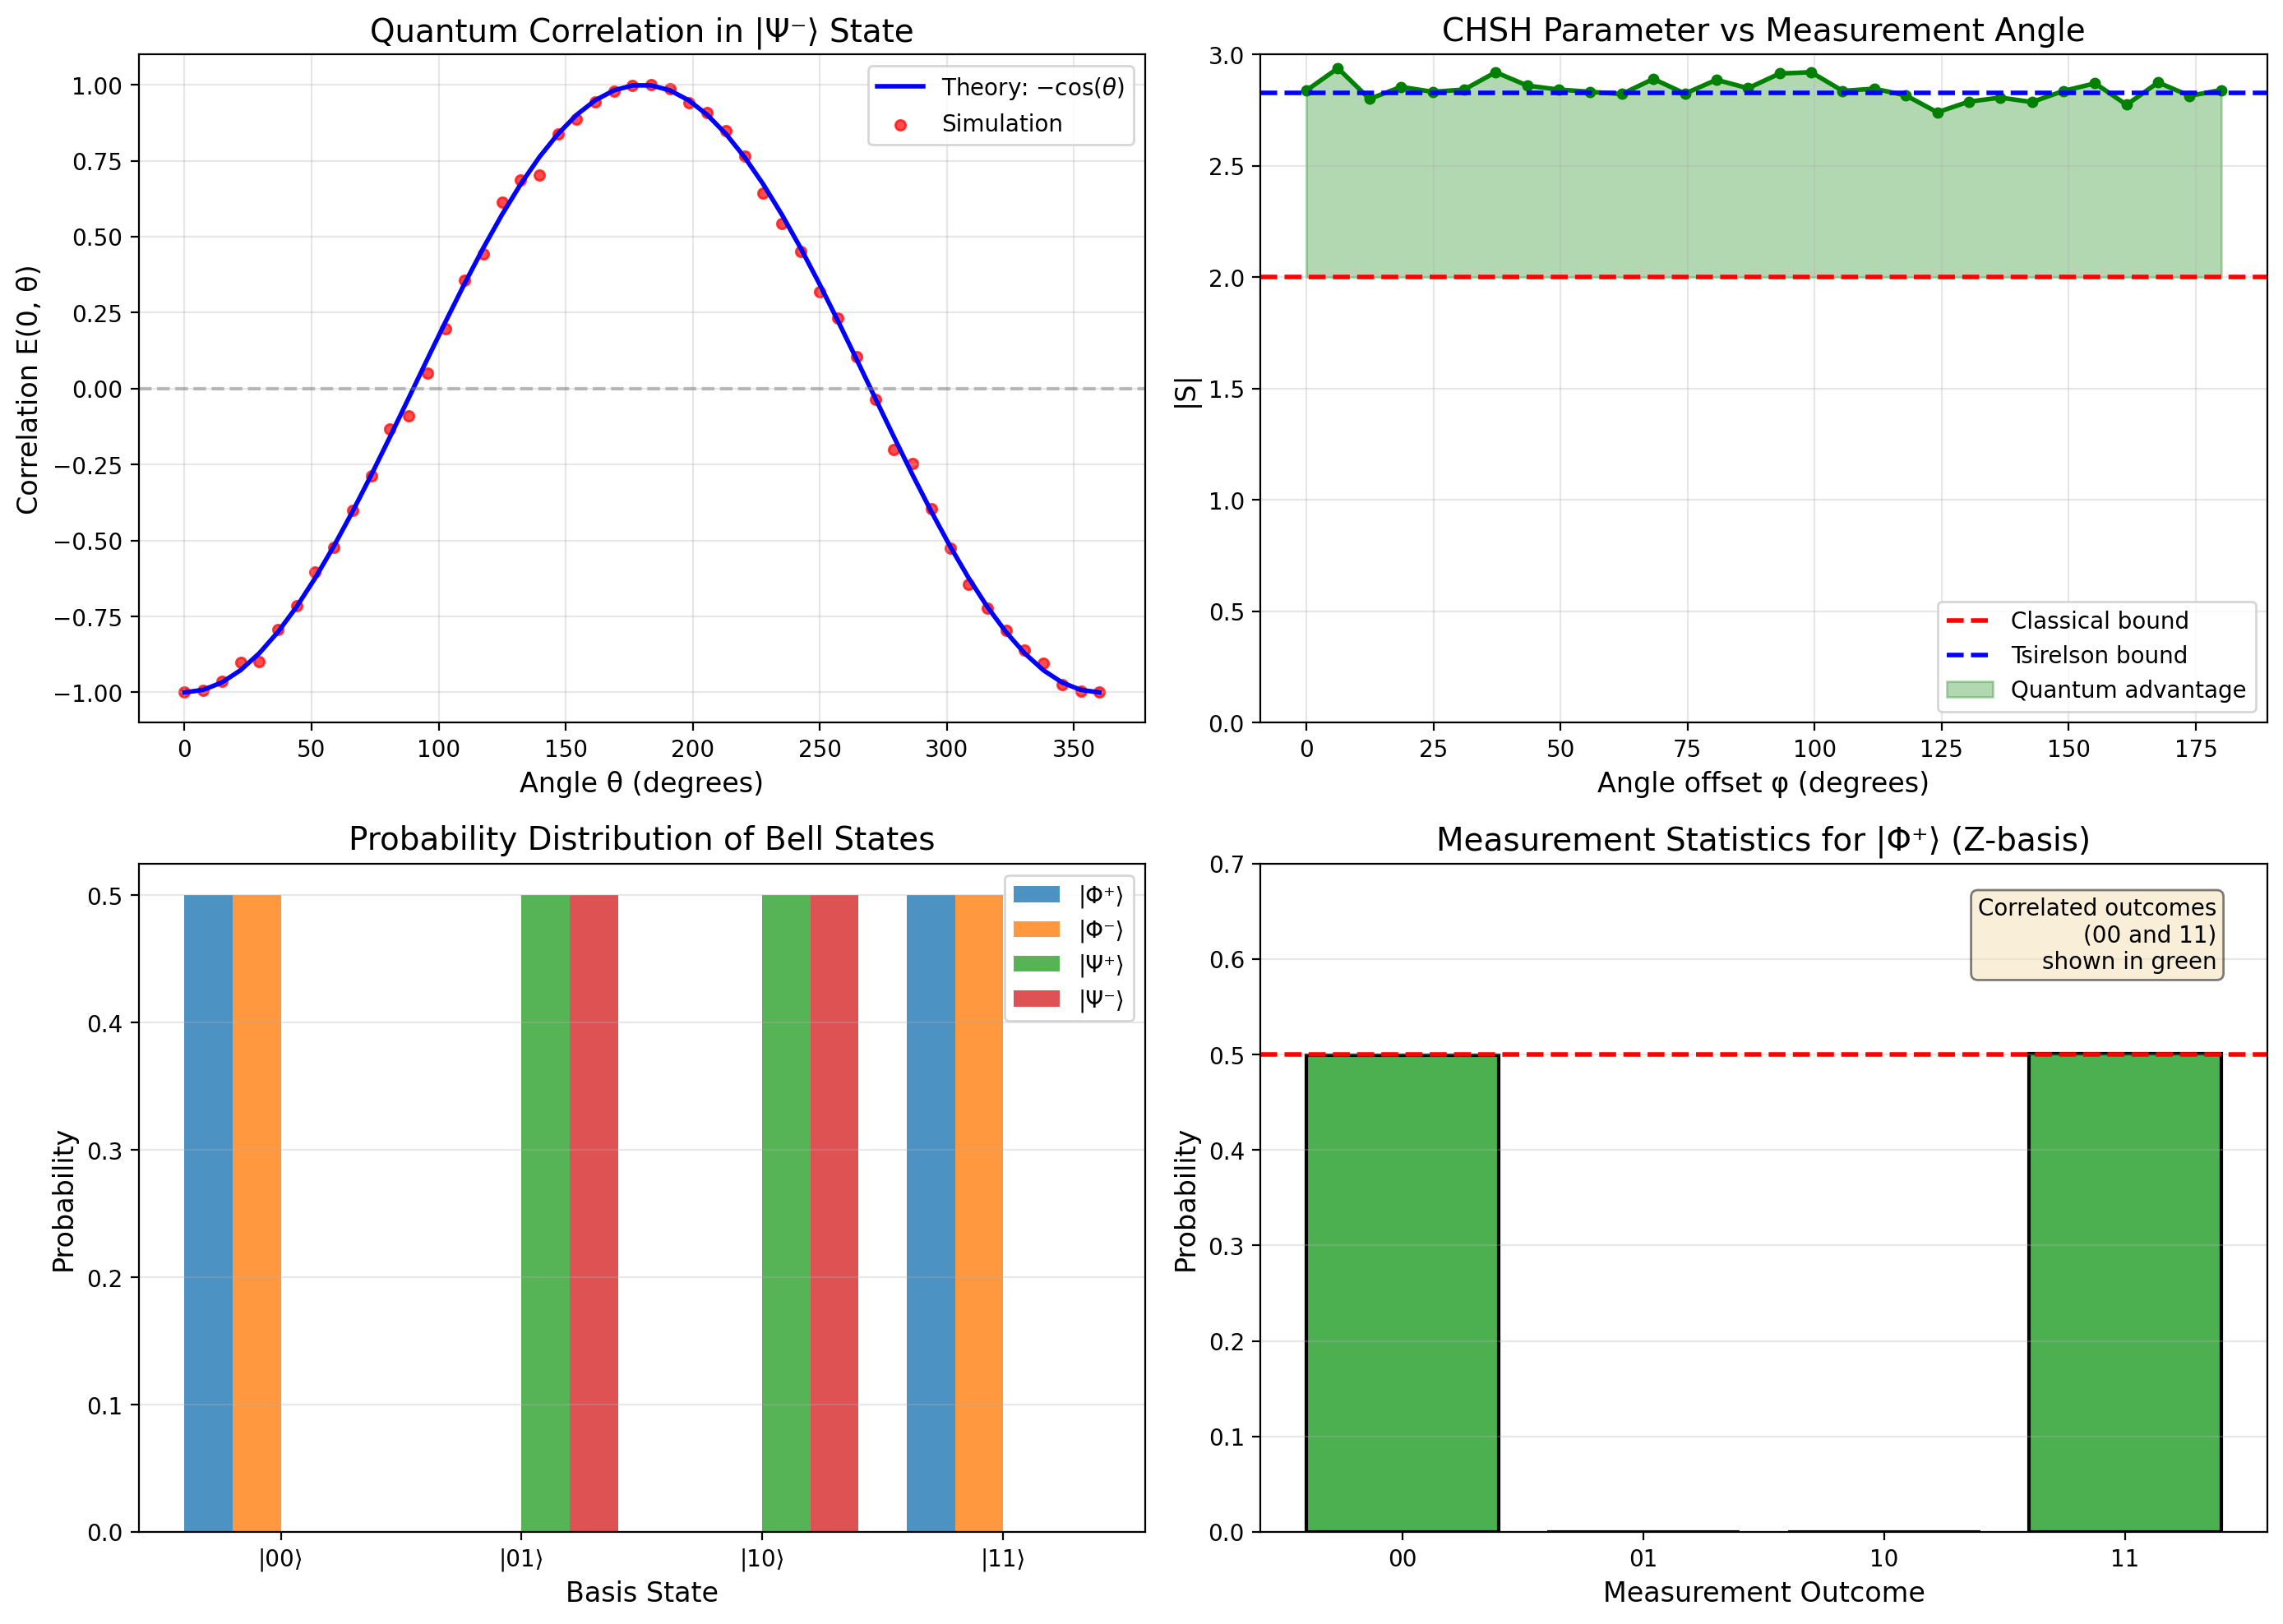


Figure saved to 'plot.png'


In [6]:
# Generate comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# Plot 1: Correlation as function of angle
ax1 = fig.add_subplot(2, 2, 1)
angles = np.linspace(0, 2*np.pi, 50)
correlations_measured = []
correlations_theory = []

singlet = create_bell_state('psi_minus')
for theta in angles:
    E = compute_correlation(singlet, 0, theta, n_measurements=1000)
    correlations_measured.append(E)
    correlations_theory.append(-np.cos(theta))

ax1.plot(np.degrees(angles), correlations_theory, 'b-', linewidth=2, label='Theory: $-\\cos(\\theta)$')
ax1.scatter(np.degrees(angles), correlations_measured, c='red', s=20, alpha=0.7, label='Simulation')
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Angle θ (degrees)', fontsize=12)
ax1.set_ylabel('Correlation E(0, θ)', fontsize=12)
ax1.set_title('Quantum Correlation in |Ψ⁻⟩ State', fontsize=14)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: CHSH parameter vs angle
ax2 = fig.add_subplot(2, 2, 2)
phi_values = np.linspace(0, np.pi, 30)
S_values = []

for phi in phi_values:
    # Standard CHSH angles with offset phi
    S, _ = compute_chsh_parameter(singlet, phi, phi + np.pi/2, 
                                   phi + np.pi/4, phi + 3*np.pi/4, 
                                   n_measurements=1000)
    S_values.append(abs(S))

ax2.plot(np.degrees(phi_values), S_values, 'g-', linewidth=2, marker='o', markersize=4)
ax2.axhline(y=2, color='red', linestyle='--', linewidth=2, label='Classical bound')
ax2.axhline(y=2*np.sqrt(2), color='blue', linestyle='--', linewidth=2, label='Tsirelson bound')
ax2.fill_between(np.degrees(phi_values), 2, S_values, 
                  where=np.array(S_values) > 2, alpha=0.3, color='green',
                  label='Quantum advantage')
ax2.set_xlabel('Angle offset φ (degrees)', fontsize=12)
ax2.set_ylabel('|S|', fontsize=12)
ax2.set_title('CHSH Parameter vs Measurement Angle', fontsize=14)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 3])

# Plot 3: Bell state amplitudes
ax3 = fig.add_subplot(2, 2, 3)
bell_types = ['phi_plus', 'phi_minus', 'psi_plus', 'psi_minus']
bell_labels = ['|Φ⁺⟩', '|Φ⁻⟩', '|Ψ⁺⟩', '|Ψ⁻⟩']
basis_labels = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']

x = np.arange(len(basis_labels))
width = 0.2
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, (btype, blabel) in enumerate(zip(bell_types, bell_labels)):
    state = create_bell_state(btype)
    probs = np.abs(state.flatten())**2
    ax3.bar(x + i*width, probs, width, label=blabel, color=colors[i], alpha=0.8)

ax3.set_xlabel('Basis State', fontsize=12)
ax3.set_ylabel('Probability', fontsize=12)
ax3.set_title('Probability Distribution of Bell States', fontsize=14)
ax3.set_xticks(x + 1.5*width)
ax3.set_xticklabels(basis_labels)
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Measurement outcome statistics
ax4 = fig.add_subplot(2, 2, 4)

# Collect measurement statistics for |Φ+⟩
phi_plus = create_bell_state('phi_plus')
outcomes = {'00': 0, '01': 0, '10': 0, '11': 0}
n_samples = 5000

for _ in range(n_samples):
    state_copy = phi_plus.copy()
    result_a, collapsed = measure_qubit(state_copy, 0, 'Z')
    result_b, _ = measure_qubit(collapsed, 1, 'Z')
    outcome = f"{result_a}{result_b}"
    outcomes[outcome] += 1

outcome_labels = list(outcomes.keys())
outcome_counts = [outcomes[k]/n_samples for k in outcome_labels]

bars = ax4.bar(outcome_labels, outcome_counts, color=['#4CAF50', '#FFC107', '#FFC107', '#4CAF50'], 
               edgecolor='black', linewidth=1.5)
ax4.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Expected: 0.5')
ax4.set_xlabel('Measurement Outcome', fontsize=12)
ax4.set_ylabel('Probability', fontsize=12)
ax4.set_title('Measurement Statistics for |Φ⁺⟩ (Z-basis)', fontsize=14)
ax4.set_ylim([0, 0.7])

# Add correlation annotation
corr_text = f"Correlated outcomes\n(00 and 11)\nshown in green"
ax4.text(0.95, 0.95, corr_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('quantum_entanglement_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary and Conclusions

This notebook demonstrated key aspects of quantum entanglement:

### Key Results

1. **Bell State Construction**: We successfully created all four maximally entangled Bell states using the quantum circuit approach (Hadamard + CNOT).

2. **Quantum Correlations**: The singlet state |Ψ⁻⟩ exhibits correlations that follow $E(\hat{a}, \hat{b}) = -\cos\theta$, demonstrating perfect anti-correlation when measurements are aligned.

3. **Bell Inequality Violation**: Our simulation achieves a CHSH parameter $|S| \approx 2\sqrt{2}$, exceeding the classical bound of 2 and approaching the Tsirelson bound.

4. **Perfect Correlations**: The |Φ⁺⟩ state shows perfect correlation in Z-basis measurements—outcomes are always 00 or 11, never 01 or 10.

### Physical Implications

The violation of Bell's inequality demonstrates that:
- Quantum mechanics cannot be explained by local hidden variable theories
- Entanglement enables correlations stronger than any classical system
- These "spooky" correlations are real and experimentally verified

### Applications

Quantum entanglement is foundational to:
- **Quantum computing**: Enables quantum parallelism and algorithms
- **Quantum cryptography**: Powers quantum key distribution (QKD)
- **Quantum teleportation**: Allows quantum state transfer
- **Quantum sensing**: Enhances measurement precision beyond classical limits